# Gaussian mixture models
Gaussian mixture models are popular for clustering data.
Generally speaking, they are continuous random variables with a special probability density, namely
$$
\rho(x) = \sum_{i = 1}^{n} \frac{w_i}{\sqrt{2 \pi \sigma_i^2}} \exp \left( \frac{(x - \mu_i)^2}{2 \sigma_i^2} \right) \quad \text{with} \quad \sum_{i = 1}^n w_i = 1,
$$
where the pairs of means and standard deviations $(\mu_i, \sigma_i)$, and the weights $w_i$ for all $i \in \{ 1, \dots, n \}$ are given.
Let's consider a simple example.

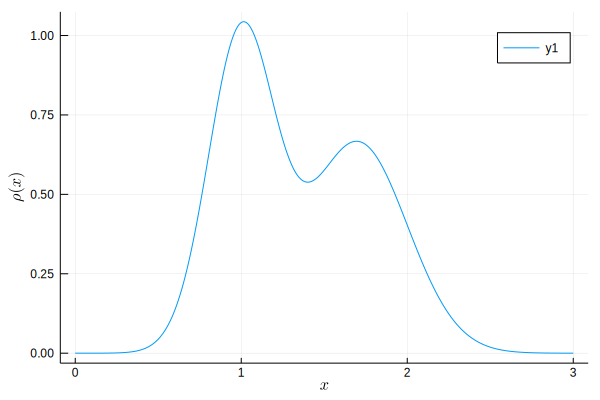

In [1]:
using Plots, LaTeXStrings
function f(x,μ,σ)
    1/sqrt(2 *π*σ^2) * exp(-(x - μ)^2 / (2σ^2))
end
μ, σ = [1., 1.7], [0.2, 0.3]
ρ(x) = 0.5*f(x,μ[1],σ[1]) + 0.5*f(x,μ[2],σ[2])
x = 0:0.01:3
plot(x,ρ.(x))
xlabel!(L"x")
ylabel!(L"\rho(x)")

This looks nice!

What are now the polynomials that are orthogonal relative to this specific density?

In [5]:
using PolyChaos
deg = 4
meas = Measure("my_GaussMixture",ρ,(-Inf,Inf),false,Dict(:μ=>μ, σ=>σ)) # build measure
opq = OrthoPoly("my_op",deg,meas;Nquad = 100,Nrec = 2*deg) # construct orthogonal polynomial
showbasis(opq,digits=2) # in case you wondered

1
x - 1.35
x^2 - 2.84x + 1.82
x^3 - 4.36x^2 + 5.94x - 2.5
x^4 - 5.91x^3 + 12.35x^2 - 10.74x + 3.26


Let's compute the square norms of the basis polynomials.

In [6]:
# opq = OrthoPolyQ(op) # add quadrature rule
T2 = Tensor(2,opq) # compute scalar products
T2num_1 = [ T2.get([i,j]) for i in 0:deg, j in 0:deg]

5×5 Array{Float64,2}:
 1.0  0.0     0.0     0.0        0.0       
 0.0  0.1875  0.0     0.0        0.0       
 0.0  0.0     0.0385  0.0        0.0       
 0.0  0.0     0.0     0.0128086  0.0       
 0.0  0.0     0.0     0.0        0.00485189

This seems correct, but let's check against numerical integration.

In [7]:
using QuadGK
T2num_2 = [quadgk(x -> evaluate(i,x,opq)*evaluate(j,x,opq)*ρ(x),-Inf,Inf)[1] for i in 0:deg, j in 0:deg ]
T2num_1 - T2num_2

5×5 Array{Float64,2}:
 -6.04488e-10  -3.22259e-9  -7.07394e-9  -8.76115e-9  6.69787e-11
 -3.22259e-9   -7.63845e-9  -1.06434e-8  -3.99774e-9  2.32482e-8 
 -7.07394e-9   -1.06434e-8  -4.58621e-9   2.11288e-8  6.44912e-8 
 -8.76115e-9   -3.99774e-9   2.11288e-8   6.42676e-8  8.77534e-8 
  6.69787e-11   2.32482e-8   6.44912e-8   8.77534e-8  1.49905e-8 

Great!
In case you run the code yourself, notice how much quicker `Tensor` is.